## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

In this project, I will analyze the results of an A/B test run by an e-commerce website, and evaluate various factors to suggest whether the website should keep their old landing page or adopt the new one they have tested, based on the conversion rates of the A/B Test users.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [126]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [13]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [127]:
converted_df = df.query('converted == 1').user_id.nunique() / df['user_id'].nunique()
# finding rows where converted is true, and user id is unique, then dividing by total number of unique users
converted_df

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [15]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]
# we looked at the group and landing page columns to compare the rows in these columns to see where they did not match (have false result)

3893

f. Do any of the rows have missing values?

In [16]:
df.info() # there's no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [3]:
df_treat_new = df.query('group == "treatment"').query('landing_page == "new_page"')
# we looked at the group and landing page columns to compare the rows in these columns to see where they did not match (have false result)
df_control_old = df.query('group == "control"').query('landing_page != "new_page"')
# we are only interested in keeping rows where the query produces True result
df2 = df_treat_new.append(df_control_old) # use append to create a new df with no false results from above queries
df2.shape

(290585, 5)

In [4]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [19]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [4]:
df2.loc[df2['user_id'].duplicated()] # locate the duplicate in the user_id column

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [5]:
df2.query('user_id == "773192"') # see if there are multiple rows for this id

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [6]:
df2.drop(df2.index[2893], inplace=True) #dropping the 2nd row, #2893

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [7]:
count_converted_true = df2.query('converted == 1').converted.count() # first find the number of converts (converted is 1) 
total_converted = df2.converted.count() # then find the total number of users
convert_probability = count_converted_true/total_converted # then divide the number of converts by total users
convert_probability

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [8]:
# use process from above, but can simplify with len
control_group = df2.query('group == "control"')
count_control_convert = len(control_group.query('converted == 1'))
control_convert_prob = count_control_convert/len(control_group)
control_convert_prob

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [9]:
treatment_group = df2.query('group == "treatment"') # find number of individuals in treatment group
treatment_convert_prob = len(treatment_group.query('converted == 1'))/len(treatment_group) # simplified from above even further
treatment_convert_prob

0.11880806551510564

d. What is the probability that an individual received the new page?

In [10]:
landing_page = df2.query('landing_page == "new_page"')
probability_landing_page = len(landing_page) / len(df2) # we similarly repeat above process
probability_landing_page

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

>It does not look like there is sufficient evidence to conclude that the new landing page had led to more conversions. The probabilities above actually show the opposite, with a slightly higher probability that those in the control group would convert than those in the treatment group.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>H0: P𝑛𝑒𝑤 <= P𝑜𝑙𝑑<br>
Null hypothesis says that the new landing page will either have a lower or the same conversion rate as the old page.<br>
H1: P𝑛𝑒𝑤 > P𝑜𝑙𝑑<br>
Alternative hypothesis says that the new landing page will have a higher conversion rate than the old page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [11]:
converted_true = df2.query('converted == 1') 
conversion_rate_new = len(converted_true)/len(df2) # count of coverted is true divided by total count of individuals
conversion_rate_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [12]:
converted_true = df2.query('converted == 1')
conversion_rate_old = len(converted_true)/len(df2) # under the null, we assume conversion rates would be the same
conversion_rate_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [13]:
treatment_group = df2.query('group == "treatment"') # looking for individuals in treatment group
count_treatment_newpage = treatment_group.query('landing_page == "new_page"') #looking for those in treatment group with new page
treat_group_new = len(count_treatment_newpage)
treat_group_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [14]:
control_group = df2.query('group == "control"')
count_control_oldpage = control_group.query('landing_page == "old_page"')
control_group_old = len(count_control_oldpage)
control_group_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [15]:
# we are looking at a total of 145310 transactions
# we assume the conversion rate is about 0.119597
# will result in 1s or 0s depending on if it was a conversion or not. 1 = conversion.
new_page_converted = np.random.binomial(1, conversion_rate_new, treat_group_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [16]:
old_page_converted = np.random.binomial(1, conversion_rate_old, control_group_old) 
# using random.binomial in order to evaluate based on conversion rate

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [17]:
new_page_converted.mean() - old_page_converted.mean()

0.0004728542467607455

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [18]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, conversion_rate_new, treat_group_new)
    old_page_converted = np.random.binomial(1, conversion_rate_old, control_group_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

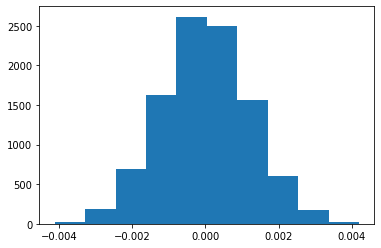

In [19]:
p_diffs = np.array(p_diffs) # change to a numpy array
plt.hist(p_diffs); # the plot looks like I expected

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [20]:
ob_diff = treatment_convert_prob - control_convert_prob # find the observed difference between conversion rates for both groups
ob_diff

-0.0015782389853555567

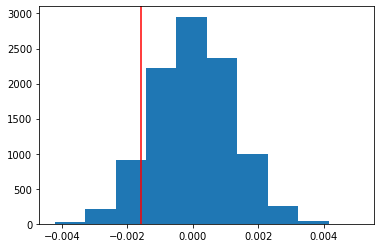

In [21]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size) # use random.normal to simulate mean values from H0
plt.hist(null_vals);
plt.axvline(x=ob_diff, color = 'red'); # plotting line where observed difference lies

In [22]:
(null_vals > ob_diff).mean() # check proportion of p_diffs greater than actual differences

0.9057

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>Here I looked at the p-value, which is the probability of getting results at least as large as results actually observed, when assuming the null hypothesis is correct.<br><br>
In examining this dataset, it looks like we do not have enough evidence to reject the null hypothesis (which stated, that the conversion rate of the new landing page would be less than or equally as effective as the old page). We are unable to reject the null, because a p-value of 0.9045 indicates that there is not strong evidence against the null.<br><br>
A p-value of ≤ 0.05 is considered statistically significant. In this case, the p-value is too high to be considered statistically significant.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [23]:
import statsmodels.api as sm

In [24]:
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique() # found these values above
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
n_old = control_group_old
n_new = treat_group_new

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [25]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [26]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
# needed to do a workaround here as I got an AttributeError below

In [27]:
stats.norm.cdf(z_score) # tells us if our z-score is significant

0.09494168724097551

In [28]:
stats.norm.ppf(1-(0.05/2)) # tells us what our critical value at 95% confidence is

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>The z-score represents the number of standard deviations a point is from the mean. The higher or lower the z-score is, the more likely the result is meaningful. In this dataset, the z-score is low, and does not exceed the critical value at 95% confidence, which indicates that the finding is less statistically significant. This matches with our earlier finding of the large p-value, and also suggests that there is not enough statistical evidence to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>I will use logistic regression in this case, as it is best to use when the dependent variable is binary, which in this case it is (converted, true or false, 1 or 0). Logistic regression is also used to predict a categorical dependent variable using independent variables, while linear regression is used to predict a continuous dependent variable using a given set of independent variables (for example, a metric like price).

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [29]:
df2['intercept'] = 1 # adding an intercept

In [30]:
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
# creating a dummy variable for landing page (landing page new, true or false)

In [74]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


In [33]:
df2 = df2.drop('old_page', axis=1) # dropping old page column to have only ab_page

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [34]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 02 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        20:22:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

>The p-value associated with ab_page is 0.19, and this is not statistically significant as it is larger than 0.05 (we consider values <= 0.05 significant). This result correlates with the results we have found earlier, and also suggests that we do not have enough statistical evidence to reject the null hypothesis. This means, that we do not have enough evidence to reject the old page in favor of using the new landing page.<br><br>The null hypothesis we are testing in the regression model is Pnew = Pold, whereas our original H0 was Pnew <= Pold. The alternative hypothesis we are testing in the regression model is Pnew != Pold (we are looking just at the difference in the 2 values), whereas the original alternative hypothesis was Pnew > Pold. The original hypotheses were looking to predict which page results in more conversions.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>There are many other influences on conversion we could consider, as A/B testing is restricted to only comparing 2 options. It doesn't tell us anything about an option we haven’t considered (for example, age, gender, country of residence, etc. could have an effect). It can also produce biased results when testing existing users, such as factors like change aversion and the novelty effect. We did make an effort to minimize these effects however early on in this example as we only looking at new users with the new page and existing users with the old page.<br><br>Something we could have also considered that was present in this dataset was timestamp: it could be possible that testing at certain times of day could have an effect (early risers who test at night may be sleepy/grumpy for example and produce unreliable results).<br><br>More issues arise however with the more variables you include: certain values may become negative when adding additional comparison factors, and additional care will need to be taken in order to manage these issues (such as adding higher order term).

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [37]:
countries.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [38]:
df3 = df2.merge(countries, on='user_id', how='left') # need to join country column to df2, keeping all columns in d2
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [39]:
df3[['US', 'CA', 'UK']] = pd.get_dummies(df3['country']) # creating dummy variables for country
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA,UK
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [40]:
df3 = df3.drop('CA', axis=1) # dropping CA column to only have 2 country columns (US, UK)

In [41]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0


In [44]:
df3['intercept'] = 1
log_mod3 = sm.Logit(df3['converted'], df3[['intercept', 'US', 'UK', 'ab_page']]) # I will now have old_page and CA as the baselines for my summary
results3 = log_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 02 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        20:26:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
US            -0.0506      0.028     -1.784      0.074      -0.106       0.005
UK            -0.0099      0.013     -0.743      0.457      -0.036       0.016
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

>The p-values for country are not statistically significant (not <= 0.05), so it does not look like country had much of an impact on the conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
df3['UK_new_page'] = df3['ab_page']* df3['UK']
df3['US_new_page'] = df3['ab_page']* df3['US']

In [46]:
log_mod4 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'UK_new_page', 'US_new_page', 'UK', 'US']])
results4 = log_mod4.fit()
results4.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 02 May 2020   Pseudo R-squ.:               3.482e-05
Time:                        20:29:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page         0.0108      0.023      0.475      0.635      -0.034       0.056
UK_new_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
US_new_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
UK              0.0057      0.019      0.306      0.760      -0.031       0.043
US             -0.0118      0.040     -0.296      0.767      -0.090       0.066
===============================================================================
"""

>It does not look like including the page changed the fact that it seems country does not have much of an impact on conversion rate. The p-values are still greater than 0.05, meaning that the results are not considered statistically significant, and it seems therefore that country is not a significant factor in predicting conversion rate. Looking at the new_page and countries together seemed to have decreased the p-values a bit, making them a bit more significant, but still falling well below the 0.05 threshold.

In [128]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0